### create label files
>  age_gender_wiki.csv

>  age_gender_imdb_under10.csv

>  age_gender_imdb_over70.csv

In [1]:
import numpy as np
from scipy.io import loadmat
import pandas as pd
import datetime as date
from dateutil.relativedelta import relativedelta

In [2]:
cols = ['age', 'gender', 'path', 'face_score1', 'face_score2']

imdb_mat = 'imdb_crop/imdb.mat'
wiki_mat = 'wiki_crop/wiki.mat'

imdb_data = loadmat(imdb_mat)
wiki_data = loadmat(wiki_mat)

del imdb_mat, wiki_mat

imdb = imdb_data['imdb']
wiki = wiki_data['wiki']

imdb_photo_taken = imdb[0][0][1][0]
imdb_full_path = imdb[0][0][2][0]
imdb_gender = imdb[0][0][3][0]
imdb_face_score1 = imdb[0][0][6][0]
imdb_face_score2 = imdb[0][0][7][0]

wiki_photo_taken = wiki[0][0][1][0]
wiki_full_path = wiki[0][0][2][0]
wiki_gender = wiki[0][0][3][0]
wiki_face_score1 = wiki[0][0][6][0]
wiki_face_score2 = wiki[0][0][7][0]

In [3]:
imdb_path = []
wiki_path = []

for path in imdb_full_path:
    imdb_path.append('imdb_crop/' + path[0])

for path in wiki_full_path:
    wiki_path.append('wiki_crop/' + path[0])

In [4]:
imdb_genders = []
wiki_genders = []

for n in range(len(imdb_gender)):
    if imdb_gender[n] == 1:
        imdb_genders.append('male')
    else:
        imdb_genders.append('female')

for n in range(len(wiki_gender)):
    if wiki_gender[n] == 1:
        wiki_genders.append('male')
    else:
        wiki_genders.append('female')

In [5]:
imdb_dob = []
wiki_dob = []

for file in imdb_path:
    temp = file.split('_')[3]
    temp = temp.split('-')
    if len(temp[1]) == 1:
        temp[1] = '0' + temp[1]
    if len(temp[2]) == 1:
        temp[2] = '0' + temp[2]

    if temp[1] == '00':
        temp[1] = '01'
    if temp[2] == '00':
        temp[2] = '01'
    
    imdb_dob.append('-'.join(temp))

for file in wiki_path:
    wiki_dob.append(file.split('_')[2])

In [6]:
imdb_age = []
wiki_age = []

for i in range(len(imdb_dob)):
    try:
        d1 = date.datetime.strptime(imdb_dob[i][0:10], '%Y-%m-%d')
        d2 = date.datetime.strptime(str(imdb_photo_taken[i]), '%Y')
        rdelta = relativedelta(d2, d1)
        diff = rdelta.years
    except Exception as ex:
        print(ex)
        diff = -1
    imdb_age.append(diff)

for i in range(len(wiki_dob)):
    try:
        d1 = date.datetime.strptime(wiki_dob[i][0:10], '%Y-%m-%d')
        d2 = date.datetime.strptime(str(wiki_photo_taken[i]), '%Y')
        rdelta = relativedelta(d2, d1)
        diff = rdelta.years
    except Exception as ex:
        print(ex)
        diff = -1
    wiki_age.append(diff)

time data '0-12-22' does not match format '%Y-%m-%d'
time data '0-05-21' does not match format '%Y-%m-%d'
time data '0-11-18' does not match format '%Y-%m-%d'
time data '0-11-18' does not match format '%Y-%m-%d'
time data '0-11-18' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-

In [7]:
final_imdb = np.vstack((imdb_age, imdb_genders, imdb_path, imdb_face_score1, imdb_face_score2)).T
final_wiki = np.vstack((wiki_age, wiki_genders, wiki_path, wiki_face_score1, wiki_face_score2)).T

final_imdb_df = pd.DataFrame(final_imdb)
final_wiki_df = pd.DataFrame(final_wiki)

final_imdb_df.columns = cols
final_wiki_df.columns = cols



In [8]:
#remove pictures does not include face
final_imdb_df = final_imdb_df[final_imdb_df['face_score1'] != '-inf']
final_wiki_df = final_wiki_df[final_wiki_df['face_score1'] != '-inf']
#some pictures include more than one face, remove them
final_imdb_df = final_imdb_df[final_imdb_df['face_score2'] == 'nan']
final_wiki_df = final_wiki_df[final_wiki_df['face_score2'] == 'nan']
# check threshold
final_imdb_df = final_imdb_df[final_imdb_df['face_score1'].astype(float) >= 2.0]
final_wiki_df = final_wiki_df[final_wiki_df['face_score1'].astype(float) >= 2.0]
# some records do not have a gender information
final_imdb_df = final_imdb_df[~final_imdb_df['gender'].isna()]
final_wiki_df = final_wiki_df[~final_wiki_df['gender'].isna()]

### 因imdb 資料量較大(about 7GB),不易上傳雲端用colab跑, 先取　wiki 的部分(about 1GB)

In [9]:
final_wiki_df = final_wiki_df[['path', 'gender', 'age']]
final_wiki_df = final_wiki_df.rename(columns={'path': 'full_path'})
final_wiki_df['gender'] = final_wiki_df['gender'].apply(lambda x: 1 if x == 'male' else 0)
final_wiki_df.to_csv('age_gender_wiki.csv', encoding="utf-8", index=False)

In [10]:
final_wiki_df

,full_path,gender,age
0,wiki_crop/17/10000217_1981-05-05_2009.jpg,1,27
2,wiki_crop/12/100012_1948-07-03_2008.jpg,1,59
4,wiki_crop/16/10002116_1971-05-31_2012.jpg,0,40
5,wiki_crop/02/10002702_1960-11-09_2012.jpg,0,51
6,wiki_crop/41/10003541_1937-09-27_1971.jpg,1,33
...,...,...,...
62321,wiki_crop/38/9996938_1937-02-15_1968.jpg,1,30
62322,wiki_crop/46/9996946_1943-11-01_1968.jpg,1,24
62323,wiki_crop/49/9996949_1937-04-17_1963.jpg,1,25
62325,wiki_crop/09/9998109_1972-12-27_2013.jpg,1,40


### 但10 歲以下和 70歲以上的data特別少
### 找imdb datasets 10 歲以下和 70歲以上的來補

In [11]:
# 取出 imdb 10 歲以下的部分
df_imdb_under10 = final_imdb_df[(final_imdb_df['age'].astype(int)<10) & (final_imdb_df['age'].astype(int)>=0)]
df_imdb_under10

,age,gender,path,face_score1,face_score2
5019,6,female,imdb_crop/06/nm0000106_rm1518967040_1975-2-22_...,4.131214305389877,nan
5149,6,female,imdb_crop/06/nm0000106_rm2385743360_1975-2-22_...,2.4326768740136884,nan
5164,6,female,imdb_crop/06/nm0000106_rm251042560_1975-2-22_1...,6.014139428913815,nan
5236,8,female,imdb_crop/06/nm0000106_rm3021649920_1975-2-22_...,3.4193476006992993,nan
20843,8,male,imdb_crop/65/nm0000165_rm2843521280_1954-3-1_1...,2.496582407530675,nan
...,...,...,...,...,...
459640,5,female,imdb_crop/13/nm0993413_rm524130816_1996-4-17_2...,3.036592060645197,nan
460140,8,female,imdb_crop/83/nm0998183_rm2262142464_2000-4-3_2...,3.311155346226713,nan
460299,8,male,imdb_crop/09/nm1993409_rm2282592768_1997-8-19_...,4.119477656062868,nan
460300,8,male,imdb_crop/09/nm1993409_rm2534251008_1997-8-19_...,2.8681796562148976,nan


In [12]:
# 只需copy一次
# src_path = '.'
# des_path = 'imdb_crop_filter/'
# for p in df_imdb_under10['path']:
#     if not os.path.exists(des_path + os.path.dirname(p)):
#         os.makedirs(des_path + os.path.dirname(p))
#     shutil.copyfile(p, des_path+p)

In [13]:
df_imdb_under10 = df_imdb_under10[['path', 'gender', 'age']]
df_imdb_under10 = df_imdb_under10.rename(columns={'path': 'full_path'})
df_imdb_under10['gender'] = df_imdb_under10['gender'].apply(lambda x: 1 if x == 'male' else 0)
df_imdb_under10.to_csv('age_gender_imdb_under10.csv', encoding="utf-8", index=False)

In [14]:
# 取出 imdb 70歲以上的部分
df_imdb_over70 = final_imdb_df[final_imdb_df['age'].astype(int)>=70]
df_imdb_over70

,age,gender,path,face_score1,face_score2
6,79,female,imdb_crop/02/nm0000002_rm1346607872_1924-9-16_...,3.4791889134154426,nan
7,79,female,imdb_crop/02/nm0000002_rm1363385088_1924-9-16_...,3.87017062712482,nan
13,82,female,imdb_crop/02/nm0000002_rm2287049216_1924-9-16_...,3.482030102193067,nan
15,81,female,imdb_crop/02/nm0000002_rm2585828096_1924-9-16_...,5.414545418118097,nan
18,81,female,imdb_crop/02/nm0000002_rm2769394176_1924-9-16_...,4.360469497529326,nan
...,...,...,...,...,...
449832,86,male,imdb_crop/78/nm0498278_rm974293248_1922-12-28_...,3.424504553924329,nan
453868,71,female,imdb_crop/19/nm0694619_rm3523791616_1942-11-2_...,3.8957028319602762,nan
453869,71,female,imdb_crop/19/nm0694619_rm3574123264_1942-11-2_...,2.2119551016796097,nan
455946,86,male,imdb_crop/56/nm0792556_rm551744512_1928-6-12_2...,4.388423347943663,nan


In [15]:
# 只需copy一次
# for p in df_imdb_over70['path']:
#     if not os.path.exists(des_path + os.path.dirname(p)):
#         os.makedirs(des_path + os.path.dirname(p))
#     shutil.copyfile(p, des_path+p)

In [16]:
df_imdb_over70 = df_imdb_over70[['path', 'gender', 'age']]
df_imdb_over70 = df_imdb_over70.rename(columns={'path': 'full_path'})
df_imdb_over70['gender'] = df_imdb_over70['gender'].apply(lambda x: 1 if x == 'male' else 0)
df_imdb_over70.to_csv('age_gender_imdb_over70.csv', encoding="utf-8", index=False)

In [17]:
data = pd.concat([final_wiki_df, df_imdb_under10, df_imdb_over70])
data

,full_path,gender,age
0,wiki_crop/17/10000217_1981-05-05_2009.jpg,1,27
2,wiki_crop/12/100012_1948-07-03_2008.jpg,1,59
4,wiki_crop/16/10002116_1971-05-31_2012.jpg,0,40
5,wiki_crop/02/10002702_1960-11-09_2012.jpg,0,51
6,wiki_crop/41/10003541_1937-09-27_1971.jpg,1,33
...,...,...,...
449832,imdb_crop/78/nm0498278_rm974293248_1922-12-28_...,1,86
453868,imdb_crop/19/nm0694619_rm3523791616_1942-11-2_...,0,71
453869,imdb_crop/19/nm0694619_rm3574123264_1942-11-2_...,0,71
455946,imdb_crop/56/nm0792556_rm551744512_1928-6-12_2...,1,86


In [18]:
# Importing dependencies

#import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import os
import shutil

In [19]:
#data = pd.read_csv('wiki_imdb_meta.csv')
#data

In [20]:
#data.columns

In [21]:
data.shape

(35347, 3)

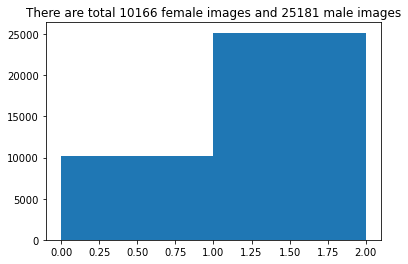

In [22]:
# gender = []
# for g in data['gender'].values:
#     if g == 'male':
#         gender.append(1)
#     else:
#         gender.append(0)
            
gender = data['gender']
plt.hist(gender, range(3))
plt.title('There are total ' + str(len(gender) - sum(gender)) + ' female images and ' + str(sum(gender)) + ' male images')
plt.show()

In [23]:
# plt.hist(data['age'], range(101))
# plt.title('Age Distribution')
# plt.show()

In [25]:
data['age_grp'] = pd.cut(data['age'].astype(int), bins=[0,10,20,30,40,50,60,70,100], right=False)
data

,full_path,gender,age,age_grp
0,wiki_crop/17/10000217_1981-05-05_2009.jpg,1,27,"[20, 30)"
2,wiki_crop/12/100012_1948-07-03_2008.jpg,1,59,"[50, 60)"
4,wiki_crop/16/10002116_1971-05-31_2012.jpg,0,40,"[40, 50)"
5,wiki_crop/02/10002702_1960-11-09_2012.jpg,0,51,"[50, 60)"
6,wiki_crop/41/10003541_1937-09-27_1971.jpg,1,33,"[30, 40)"
...,...,...,...,...
449832,imdb_crop/78/nm0498278_rm974293248_1922-12-28_...,1,86,"[70, 100)"
453868,imdb_crop/19/nm0694619_rm3523791616_1942-11-2_...,0,71,"[70, 100)"
453869,imdb_crop/19/nm0694619_rm3574123264_1942-11-2_...,0,71,"[70, 100)"
455946,imdb_crop/56/nm0792556_rm551744512_1928-6-12_2...,1,86,"[70, 100)"


In [26]:
s = data.groupby(['age_grp'])['gender'].value_counts()
print(s.index)
print(s.values)

MultiIndex([(  [0, 10), 0),
            (  [0, 10), 1),
            ( [10, 20), 1),
            ( [10, 20), 0),
            ( [20, 30), 1),
            ( [20, 30), 0),
            ( [30, 40), 1),
            ( [30, 40), 0),
            ( [40, 50), 1),
            ( [40, 50), 0),
            ( [50, 60), 1),
            ( [50, 60), 0),
            ( [60, 70), 1),
            ( [60, 70), 0),
            ([70, 100), 1),
            ([70, 100), 0)],
           names=['age_grp', 'gender'])
[ 518  380 1185  940 7884 3527 4691 1934 3565 1116 2722  698 1771  403
 2957 1016]


In [27]:
s = data.groupby(['gender'])['age_grp'].value_counts()
print(s.index)
print(s.values)
s = s.sort_index()
s

MultiIndex([(0,  [20, 30)),
            (0,  [30, 40)),
            (0,  [40, 50)),
            (0, [70, 100)),
            (0,  [10, 20)),
            (0,  [50, 60)),
            (0,   [0, 10)),
            (0,  [60, 70)),
            (1,  [20, 30)),
            (1,  [30, 40)),
            (1,  [40, 50)),
            (1, [70, 100)),
            (1,  [50, 60)),
            (1,  [60, 70)),
            (1,  [10, 20)),
            (1,   [0, 10))],
           names=['gender', 'age_grp'])
[3527 1934 1116 1016  940  698  518  403 7884 4691 3565 2957 2722 1771
 1185  380]


gender  age_grp  
0       [0, 10)       518
        [10, 20)      940
        [20, 30)     3527
        [30, 40)     1934
        [40, 50)     1116
        [50, 60)      698
        [60, 70)      403
        [70, 100)    1016
1       [0, 10)       380
        [10, 20)     1185
        [20, 30)     7884
        [30, 40)     4691
        [40, 50)     3565
        [50, 60)     2722
        [60, 70)     1771
        [70, 100)    2957
Name: age_grp, dtype: int64

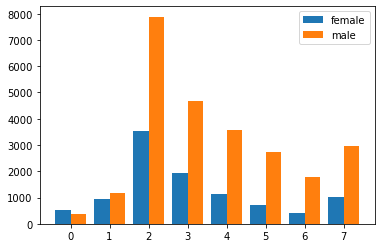

In [28]:
import numpy as np
x = np.arange(8)
width = 0.4
plt.bar(x-width/2, s[:8].values, width, label='female')
plt.bar(x+width/2, s[8:].values, width, label='male')
plt.legend()

In [29]:
s[0:8].values

array([ 518,  940, 3527, 1934, 1116,  698,  403, 1016], dtype=int64)

In [30]:
s[8:].values

array([ 380, 1185, 7884, 4691, 3565, 2722, 1771, 2957], dtype=int64)